In [326]:
#import what needs to be imported for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
%matplotlib inline


In [327]:
# read in csv
SSA_data_dirt = pd.read_csv('SSA-SA-FYWL.csv')

#remove the one 'state' with missing values
SSA_data=SSA_data_dirt[SSA_data_dirt['State Code'] != 'PR ']

In [328]:
#Give adding details that will be important for plotting later on.

# get 50 different colors
N = len(np.unique(SSA_data['State Code']))
StateColors = {
    'Colors': np.random.random(N),
    'State Code': np.unique(SSA_data['State Code'])
}
StateColorMap = pd.DataFrame(StateColors)
# merge
SSA_data = pd.merge(SSA_data, StateColorMap, on = 'State Code', how = "left")

# convert date to numeric
SSA_data['Date_numeric'] = pd.to_numeric(SSA_data['Date'])


In [329]:
#fix outliers

#linear interpolation
def interpol_pop(state_code):
    t1=SSA_data.loc[(SSA_data['State Code']== state_code) & (SSA_data['Date_numeric']==2012),'Population age 18-64'].mean()
    t2=SSA_data.loc[(SSA_data['State Code']== state_code) & (SSA_data['Date_numeric']==2014),'Population age 18-64'].mean()
    SSA_data.loc[(SSA_data['Date_numeric']==2013) & (SSA_data['State Code']== state_code),'Population age 18-64']=(t1+t2)/2
    
interpol_pop('NH ')
interpol_pop('KY ')
interpol_pop('OK ')
interpol_pop('NV ')

#replace outliers with it's mean
#def mean_replacer(state_code):
#   mean_pops_NH=SSA_data.loc[(SSA_data['State Code']== state_code) & (SSA_data['Date_numeric']!=2013),'Population age 18-64'].mean()
#   SSA_data.loc[(SSA_data['Date_numeric']==2013) & (SSA_data['State Code']== state_code),'Population age 18-64']=mean_pops_NH


In [330]:
#Grouping frames by Regions

#regional dataframes
atl=SSA_data.loc[SSA_data['Region Code']=='ATL']
bos=SSA_data.loc[SSA_data['Region Code']=='BOS']
chi=SSA_data.loc[SSA_data['Region Code']=='CHI']
dal=SSA_data.loc[SSA_data['Region Code']=='DAL']
den=SSA_data.loc[SSA_data['Region Code']=='DEN']
kcm=SSA_data.loc[SSA_data['Region Code']=='KCM']
nyc=SSA_data.loc[SSA_data['Region Code']=='NYC']
phl=SSA_data.loc[SSA_data['Region Code']=='PHL']
sea=SSA_data.loc[SSA_data['Region Code']=='SEA']
sfo=SSA_data.loc[SSA_data['Region Code']=='SFO']

#list of regions
regions=[atl,bos,chi,dal,den,kcm,nyc,phl,sea,sfo]

In [331]:
#ATL states as individual dataframes
AL=SSA_data.loc[SSA_data['State Code']=='AL ']
FL=SSA_data.loc[SSA_data['State Code']=='FL ']
GA=SSA_data.loc[SSA_data['State Code']=='GA ']
KY=SSA_data.loc[SSA_data['State Code']=='KY ']
MS=SSA_data.loc[SSA_data['State Code']=='MS ']
NC=SSA_data.loc[SSA_data['State Code']=='NC ']
SC=SSA_data.loc[SSA_data['State Code']=='SC ']
TN=SSA_data.loc[SSA_data['State Code']=='TN ']



In [332]:
#BOS as individual dataframes

MA=SSA_data.loc[SSA_data['State Code']=='MA ']
ME=SSA_data.loc[SSA_data['State Code']=='ME ']
NH=SSA_data.loc[SSA_data['State Code']=='NH ']
VT=SSA_data.loc[SSA_data['State Code']=='VT ']
RI=SSA_data.loc[SSA_data['State Code']=='RI ']
CT=SSA_data.loc[SSA_data['State Code']=='CT ']


In [333]:
#CHI states as individual dataframes
IL=SSA_data.loc[SSA_data['State Code']=='IL ']
IN=SSA_data.loc[SSA_data['State Code']=='IN ']
MI=SSA_data.loc[SSA_data['State Code']=='MI ']
MN=SSA_data.loc[SSA_data['State Code']=='MN ']
OH=SSA_data.loc[SSA_data['State Code']=='OH ']
WI=SSA_data.loc[SSA_data['State Code']=='WI ']


In [334]:
#DAL states as individual dataframes
AR=SSA_data.loc[SSA_data['State Code']=='AR ']
LA=SSA_data.loc[SSA_data['State Code']=='LA ']
NM=SSA_data.loc[SSA_data['State Code']=='NM ']
OK=SSA_data.loc[SSA_data['State Code']=='OK ']
TX=SSA_data.loc[SSA_data['State Code']=='TX ']


In [335]:
#DEN states as individual dataframes
CO=SSA_data.loc[SSA_data['State Code']=='CO ']
MT=SSA_data.loc[SSA_data['State Code']=='MT ']
ND=SSA_data.loc[SSA_data['State Code']=='ND ']
SD=SSA_data.loc[SSA_data['State Code']=='SD ']
UT=SSA_data.loc[SSA_data['State Code']=='UT ']
WY=SSA_data.loc[SSA_data['State Code']=='WY ']


In [336]:
#KCM states as individual dataframes
IA=SSA_data.loc[SSA_data['State Code']=='IA ']
KS=SSA_data.loc[SSA_data['State Code']=='KS ']
MO=SSA_data.loc[SSA_data['State Code']=='MO ']
NE=SSA_data.loc[SSA_data['State Code']=='NE ']


In [337]:
#NYC states as individual dataframes
NJ=SSA_data.loc[SSA_data['State Code']=='NJ ']
NY=SSA_data.loc[SSA_data['State Code']=='NY ']


In [338]:
#PHL states as individual dataframes
DC=SSA_data.loc[SSA_data['State Code']=='DC ']
DE=SSA_data.loc[SSA_data['State Code']=='DE ']
MD=SSA_data.loc[SSA_data['State Code']=='MD ']
PA=SSA_data.loc[SSA_data['State Code']=='PA ']
VA=SSA_data.loc[SSA_data['State Code']=='VA ']
WV=SSA_data.loc[SSA_data['State Code']=='WV ']


In [339]:
#SEA states as individual dataframes
AK=SSA_data.loc[SSA_data['State Code']=='AK ']
ID=SSA_data.loc[SSA_data['State Code']=='ID ']
OR=SSA_data.loc[SSA_data['State Code']=='OR ']
WA=SSA_data.loc[SSA_data['State Code']=='WA ']


In [340]:
#SFO states as individual dataframes.  Guam excluded since it is not in the data set.
AZ=SSA_data.loc[SSA_data['State Code']=='AZ ']
CA=SSA_data.loc[SSA_data['State Code']=='CA ']
HI=SSA_data.loc[SSA_data['State Code']=='HI ']
NV=SSA_data.loc[SSA_data['State Code']=='NV ']


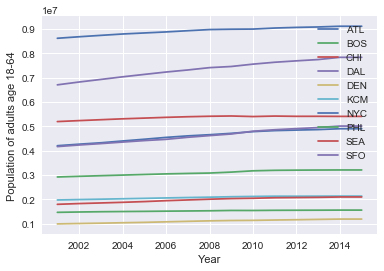

In [341]:
#groupby to plot population trends by region
SSA_agg = SSA_data.groupby(['Region Code','Date_numeric'])['Population age 18-64'].mean()
SSA_agg_df=pd.DataFrame(SSA_agg).reset_index()
SSA_agg_df['Population age 18-64']=SSA_agg_df['Population age 18-64'].apply(np.int64)

#separate regions
d1=SSA_agg_df[SSA_agg_df['Region Code'] == 'ATL'][['Date_numeric','Population age 18-64']]
d2=SSA_agg_df[SSA_agg_df['Region Code'] == 'BOS'][['Date_numeric','Population age 18-64']]
d3=SSA_agg_df[SSA_agg_df['Region Code'] == 'CHI'][['Date_numeric','Population age 18-64']]
d4=SSA_agg_df[SSA_agg_df['Region Code'] == 'DAL'][['Date_numeric','Population age 18-64']]
d5=SSA_agg_df[SSA_agg_df['Region Code'] == 'DEN'][['Date_numeric','Population age 18-64']]
d6=SSA_agg_df[SSA_agg_df['Region Code'] == 'KCM'][['Date_numeric','Population age 18-64']]
d7=SSA_agg_df[SSA_agg_df['Region Code'] == 'NYC'][['Date_numeric','Population age 18-64']]
d8=SSA_agg_df[SSA_agg_df['Region Code'] == 'PHL'][['Date_numeric','Population age 18-64']]
d9=SSA_agg_df[SSA_agg_df['Region Code'] == 'SEA'][['Date_numeric','Population age 18-64']]
d10=SSA_agg_df[SSA_agg_df['Region Code'] == 'SFO'][['Date_numeric','Population age 18-64']]

#reset indexes
d_list=[d1,d2,d3,d4,d5,d6,d7,d7,d8,d9,d10]
for data in d_list:
    data.reset_index(inplace=True)

#plot d1 through d10 in one chart to compare growth
_=plt.plot(d1['Date_numeric'], d1['Population age 18-64'])
_=plt.plot(d2['Date_numeric'], d2['Population age 18-64'])
_=plt.plot(d3['Date_numeric'], d3['Population age 18-64'])
_=plt.plot(d4['Date_numeric'], d4['Population age 18-64'])
_=plt.plot(d5['Date_numeric'], d5['Population age 18-64'])
_=plt.plot(d6['Date_numeric'], d6['Population age 18-64'])
_=plt.plot(d7['Date_numeric'], d7['Population age 18-64'])
_=plt.plot(d8['Date_numeric'], d8['Population age 18-64'])
_=plt.plot(d9['Date_numeric'], d9['Population age 18-64'])
_=plt.plot(d10['Date_numeric'], d10['Population age 18-64'])

_=plt.xlabel('Year')
_=plt.ylabel('Population of adults age 18-64')
_=plt.legend(['ATL', 'BOS', 'CHI', 'DAL', 'DEN', 'KCM', 'NYC', 'PHL', 'SEA', 'SFO'])
plt.show()



In [342]:
#create function to plot regression line for each state or region

def line_regress_plot(x,y,tit):
    plt.plot(x,y)
    plt.title(tit)
    m,b=np.polyfit(x, y,1)
    _=plt.plot(x, m*x+b, color='m', linestyle='dashed')


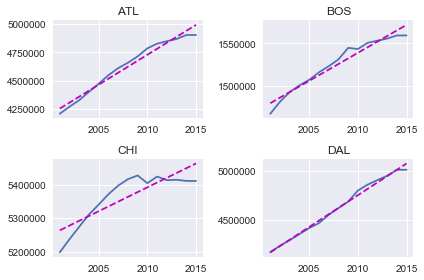

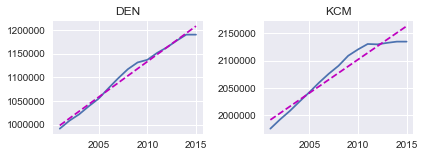

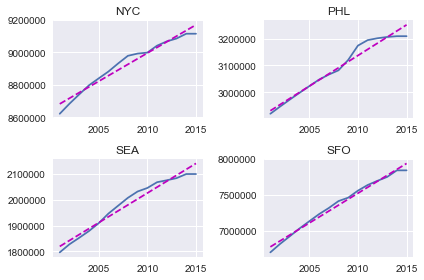

In [343]:
plt.subplot(2,2,1)
line_regress_plot(d1['Date_numeric'], d1['Population age 18-64'], 'ATL')
plt.subplot(2,2,2)
line_regress_plot(d2['Date_numeric'], d2['Population age 18-64'], 'BOS')
plt.subplot(2,2,3)
line_regress_plot(d3['Date_numeric'], d3['Population age 18-64'], 'CHI')
plt.subplot(2,2,4)
line_regress_plot(d4['Date_numeric'], d4['Population age 18-64'], 'DAL')

plt.tight_layout()
plt.show()


plt.subplot(2,2,1)
line_regress_plot(d5['Date_numeric'], d5['Population age 18-64'], 'DEN')
plt.subplot(2,2,2)
line_regress_plot(d6['Date_numeric'], d6['Population age 18-64'], 'KCM')

plt.tight_layout()
plt.show()


plt.subplot(2,2,1)
line_regress_plot(d7['Date_numeric'], d7['Population age 18-64'], 'NYC')

plt.subplot(2,2,2)
line_regress_plot(d8['Date_numeric'], d8['Population age 18-64'], 'PHL')

plt.subplot(2,2,3)
line_regress_plot(d9['Date_numeric'], d9['Population age 18-64'], 'SEA')

plt.subplot(2,2,4)
line_regress_plot(d10['Date_numeric'], d10['Population age 18-64'], 'SFO')

plt.tight_layout()
plt.show()

#Boston and San Fransisco show significant bumps in 2013.  May want to look into that.

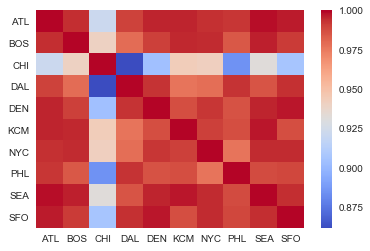

In [344]:
#plot correlations of regions

#create a dataframe with populations from all the regions
d_list_pop=[d1['Population age 18-64'], d2['Population age 18-64'], d3['Population age 18-64'],d4['Population age 18-64'],d5['Population age 18-64'],d6['Population age 18-64'],d7['Population age 18-64'],d8['Population age 18-64'],d9['Population age 18-64'],d10['Population age 18-64']]
corrs=pd.concat(d_list_pop, axis=1)
corrs.columns=['ATL', 'BOS', 'CHI', 'DAL', 'DEN', 'KCM', 'NYC', 'PHL', 'SEA', 'SFO']
corrs=corrs.corr()
#corrs.index=corrs.columns

sns.set()
sns.heatmap(corrs, cmap='coolwarm')




All regions are highly correlated with one another.

In [345]:
#Control Panel for changing the plots by state easier.

x_label='Year'
xcolumn='Date_numeric'


y_label='Adult Population'
ycolumn='Population age 18-64'
#ycolumn='Adult Favorable  Determination Rate'
#column='Percent of Adult Population Receiving SSA Adult Disability Benefits'



ATL Region


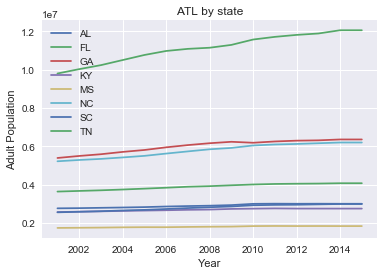

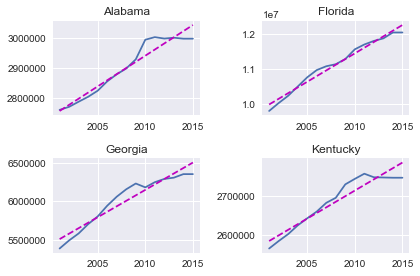

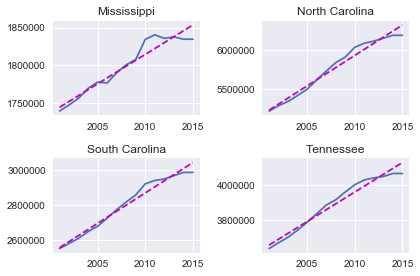

In [346]:
#ATL plots

print('ATL Region')

plt.plot(AL[xcolumn], AL[ycolumn])
plt.plot(FL[xcolumn], FL[ycolumn])
plt.plot(GA[xcolumn], GA[ycolumn])
plt.plot(KY[xcolumn], KY[ycolumn])
plt.plot(MS[xcolumn], MS[ycolumn])
plt.plot(NC[xcolumn], NC[ycolumn])
plt.plot(SC[xcolumn], SC[ycolumn])
plt.plot(TN[xcolumn], TN[ycolumn])
plt.title('ATL by state')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.legend(['AL','FL','GA','KY','MS','NC','SC','TN'])
plt.show()


plt.subplot(2,2,1)
line_regress_plot(AL[xcolumn], AL[ycolumn], 'Alabama')
plt.subplot(2,2,2)
line_regress_plot(FL[xcolumn], FL[ycolumn], 'Florida')
plt.subplot(2,2,3)
line_regress_plot(GA[xcolumn], GA[ycolumn], 'Georgia')
plt.subplot(2,2,4)
line_regress_plot(KY[xcolumn], KY[ycolumn], 'Kentucky')

plt.tight_layout()
plt.show()

plt.subplot(2,2,1)
line_regress_plot(MS[xcolumn], MS[ycolumn], 'Mississippi')
plt.subplot(2,2,2)
line_regress_plot(NC[xcolumn], NC[ycolumn], 'North Carolina')
plt.subplot(2,2,3)
line_regress_plot(SC[xcolumn], SC[ycolumn], 'South Carolina') 
plt.subplot(2,2,4)
line_regress_plot(TN[xcolumn], TN[ycolumn], 'Tennessee')
    
plt.tight_layout()
plt.show()

Although Florida may seem like an outlier, The data is in fatc accurate and matches that in other data sets on the web.

BOS Region


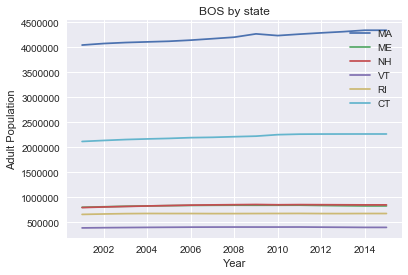

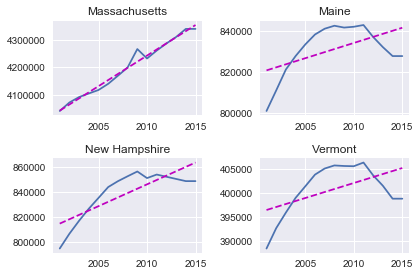

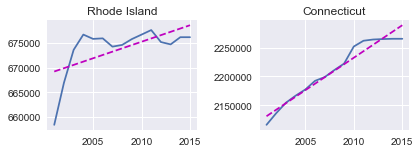

In [347]:
#BOS plots

print('BOS Region')

plt.plot(MA[xcolumn], MA[ycolumn])
plt.plot(ME[xcolumn], ME[ycolumn])
plt.plot(NH[xcolumn], NH[ycolumn])
plt.plot(VT[xcolumn], VT[ycolumn])
plt.plot(RI[xcolumn], RI[ycolumn])
plt.plot(CT[xcolumn], CT[ycolumn])
plt.title('BOS by state')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.legend(['MA','ME','NH','VT','RI','CT'])
plt.show()

plt.subplot(2,2,1)
line_regress_plot(MA[xcolumn], MA[ycolumn], 'Massachusetts')
plt.subplot(2,2,2)
line_regress_plot(ME[xcolumn], ME[ycolumn], 'Maine')
plt.subplot(2,2,3)
line_regress_plot(NH[xcolumn], NH[ycolumn], 'New Hampshire')
plt.subplot(2,2,4)
line_regress_plot(VT[xcolumn], VT[ycolumn], 'Vermont')
    
plt.tight_layout()
plt.show()


plt.subplot(2,2,1)
line_regress_plot(RI[xcolumn], RI[ycolumn], 'Rhode Island')
plt.subplot(2,2,2)
line_regress_plot(CT[xcolumn], CT[ycolumn], 'Connecticut')
    
plt.tight_layout()
plt.show()

New Hampshire, Vermont, and Maine all have very similar trends in population since they all share the same forest and mountain geography.  Rhode Island has been struggling to build industry since losing manufacturing to overseas.

CHI Region


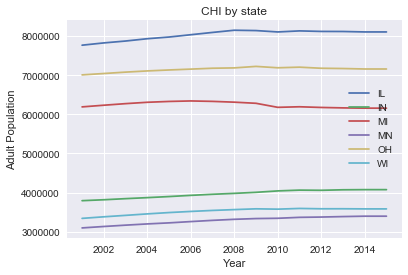

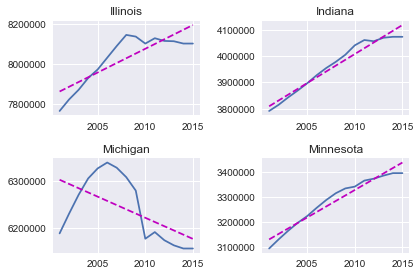

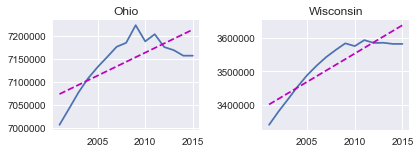

In [348]:
#CHI plots

print('CHI Region')

plt.plot(IL[xcolumn], IL[ycolumn])
plt.plot(IN[xcolumn], IN[ycolumn])
plt.plot(MI[xcolumn], MI[ycolumn])
plt.plot(MN[xcolumn], MN[ycolumn])
plt.plot(OH[xcolumn], OH[ycolumn])
plt.plot(WI[xcolumn], WI[ycolumn])
plt.title('CHI by state')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.legend(['IL','IN','MI','MN','OH','WI'])
plt.show()

plt.subplot(2,2,1)
line_regress_plot(IL[xcolumn], IL[ycolumn], 'Illinois')
plt.subplot(2,2,2)
line_regress_plot(IN[xcolumn], IN[ycolumn], 'Indiana')
plt.subplot(2,2,3)
line_regress_plot(MI[xcolumn], MI[ycolumn], 'Michigan')  
plt.subplot(2,2,4)
line_regress_plot(MN[xcolumn], MN[ycolumn], 'Minnesota') 

plt.tight_layout()
plt.show()

plt.subplot(2,2,1)
line_regress_plot(OH[xcolumn], OH[ycolumn], 'Ohio')
plt.subplot(2,2,2)
line_regress_plot(WI[xcolumn], WI[ycolumn], 'Wisconsin')
    
plt.tight_layout()
plt.show()

Michigan was hit especially hard by the financial crisis and lost many jobs related to the auto industry, which it relied heavily on.  Ohio is also losing jobs, especially in manufacturing which could be related to the decline in it's youth population.  Illinois has had a steady decline for some time and consensus on the web seems to be tax related.  Their severe financial burden is chasing residents out in addition to the state's stagnant growth.

DAL Region


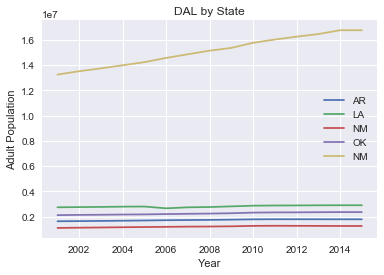

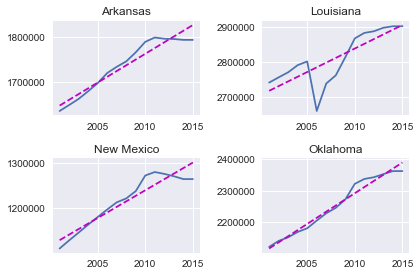

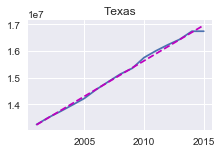

In [349]:
#DAL plots

print('DAL Region')

plt.plot(AR[xcolumn], AR[ycolumn])
plt.plot(LA[xcolumn], LA[ycolumn])
plt.plot(NM[xcolumn], NM[ycolumn])
plt.plot(OK[xcolumn], OK[ycolumn])
plt.plot(TX[xcolumn], TX[ycolumn])
plt.title('DAL by State')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.legend(['AR','LA','NM','OK','NM'])
plt.show()


plt.subplot(2,2,1)
line_regress_plot(AR[xcolumn], AR[ycolumn], 'Arkansas')
plt.subplot(2,2,2)
line_regress_plot(LA[xcolumn], LA[ycolumn], 'Louisiana')
plt.subplot(2,2,3)
line_regress_plot(NM[xcolumn], NM[ycolumn], 'New Mexico')
plt.subplot(2,2,4)
line_regress_plot(OK[xcolumn], OK[ycolumn], 'Oklahoma')
    
plt.tight_layout()
plt.show()

plt.subplot(2,2,1)
line_regress_plot(TX[xcolumn], TX[ycolumn], 'Texas')
    
plt.tight_layout()
plt.show()

New Mexico is also accurate, despite appearing as wrong data.  Louisiana looks especially hard hit from Hurricane Katrina, but has since rebounded quickly.

DEN Region


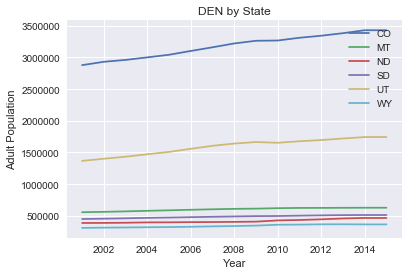

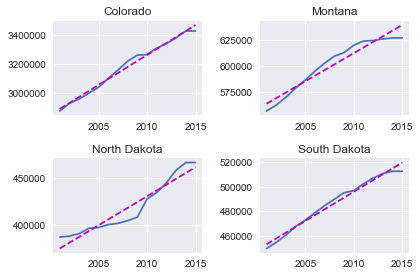

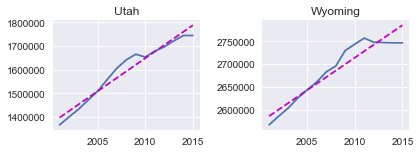

In [350]:
#DEN plots

print('DEN Region')

plt.plot(CO[xcolumn], CO[ycolumn])
plt.plot(MT[xcolumn], MT[ycolumn])
plt.plot(ND[xcolumn], ND[ycolumn])
plt.plot(SD[xcolumn], SD[ycolumn])
plt.plot(UT[xcolumn], UT[ycolumn])
plt.plot(WY[xcolumn], WY[ycolumn])
plt.title('DEN by State')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.legend(['CO','MT','ND','SD','UT','WY'])
plt.show()

plt.subplot(2,2,1)
line_regress_plot(CO[xcolumn], CO[ycolumn], 'Colorado')
plt.subplot(2,2,2)
line_regress_plot(MT[xcolumn], MT[ycolumn], 'Montana')
plt.subplot(2,2,3)
line_regress_plot(ND[xcolumn], ND[ycolumn], 'North Dakota')   
plt.subplot(2,2,4)
line_regress_plot(SD[xcolumn], SD[ycolumn], 'South Dakota')

plt.tight_layout()
plt.show()

plt.subplot(2,2,1)
line_regress_plot(UT[xcolumn], UT[ycolumn], 'Utah')
plt.subplot(2,2,2)
line_regress_plot(KY[xcolumn], KY[ycolumn], 'Wyoming')
    
plt.tight_layout()
plt.show()

KCM Region


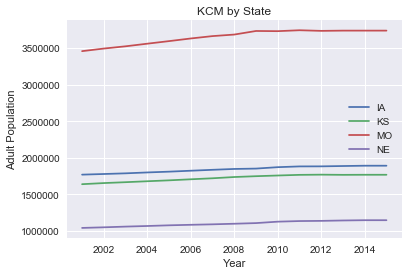

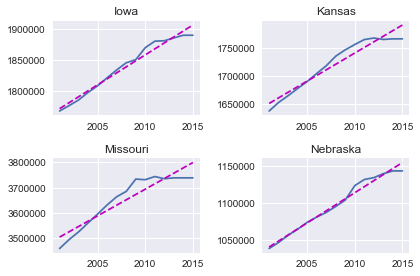

In [351]:
#KCM plots

print('KCM Region')

plt.plot(IA[xcolumn], IA[ycolumn])
plt.plot(KS[xcolumn], KS[ycolumn])
plt.plot(MO[xcolumn], MO[ycolumn])
plt.plot(NE[xcolumn], NE[ycolumn])
plt.title('KCM by State')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.legend(['IA','KS','MO','NE'])
plt.show()

plt.subplot(2,2,1)
line_regress_plot(IA[xcolumn], IA[ycolumn], 'Iowa')

plt.subplot(2,2,2)
line_regress_plot(KS[xcolumn], KS[ycolumn], 'Kansas')

plt.subplot(2,2,3)
line_regress_plot(MO[xcolumn], MO[ycolumn], 'Missouri')

plt.subplot(2,2,4)
line_regress_plot(NE[xcolumn], NE[ycolumn], 'Nebraska')
    
plt.tight_layout()
plt.show()



NYC Region


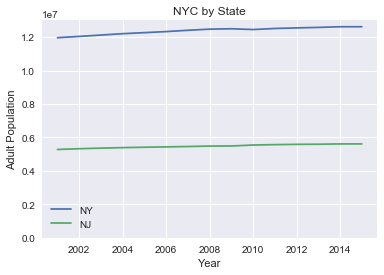

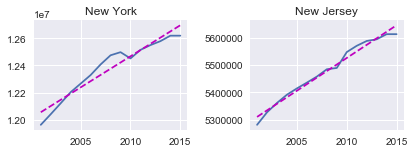

In [352]:
#NYC Plots

print('NYC Region')

plt.plot(NY[xcolumn], NY[ycolumn])
plt.plot(NJ[xcolumn], NJ[ycolumn])
plt.title('NYC by State')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.legend(['NY','NJ'])
plt.ylim([0,13000000])
plt.show()

plt.subplot(2,2,1)
line_regress_plot(NY[xcolumn], NY[ycolumn], 'New York')
plt.subplot(2,2,2)
line_regress_plot(NJ[xcolumn], NJ[ycolumn], 'New Jersey')
    
plt.tight_layout()
plt.show()

PHL Region


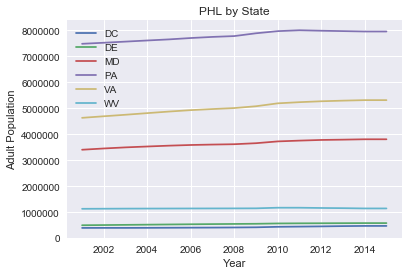

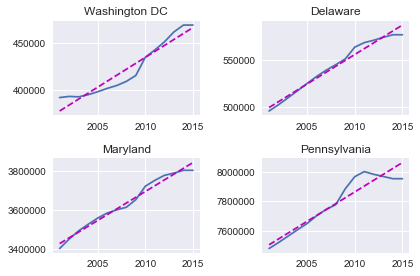

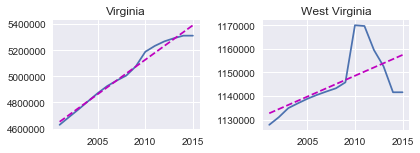

In [353]:
#PHL plots

print('PHL Region')

plt.plot(DC[xcolumn], DC[ycolumn])
plt.plot(DE[xcolumn], DE[ycolumn])
plt.plot(MD[xcolumn], MD[ycolumn])
plt.plot(PA[xcolumn], PA[ycolumn])
plt.plot(VA[xcolumn], VA[ycolumn])
plt.plot(WV[xcolumn], WV[ycolumn])
plt.title('PHL by State')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.legend(['DC','DE','MD','PA','VA','WV'])
plt.show()

plt.subplot(2,2,1)
line_regress_plot(DC[xcolumn], DC[ycolumn], 'Washington DC')
plt.subplot(2,2,2)
line_regress_plot(DE[xcolumn], DE[ycolumn], 'Delaware')
plt.subplot(2,2,3)
line_regress_plot(MD[xcolumn], MD[ycolumn], 'Maryland')  
plt.subplot(2,2,4)
line_regress_plot(PA[xcolumn], PA[ycolumn], 'Pennsylvania')

plt.tight_layout()
plt.show()

plt.subplot(2,2,1)
line_regress_plot(VA[xcolumn], VA[ycolumn], 'Virginia')
plt.subplot(2,2,2)
line_regress_plot(WV[xcolumn], WV[ycolumn], 'West Virginia')

plt.tight_layout()
plt.show()

SEA Region


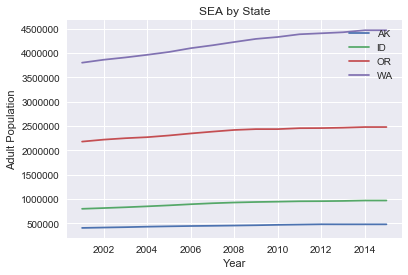

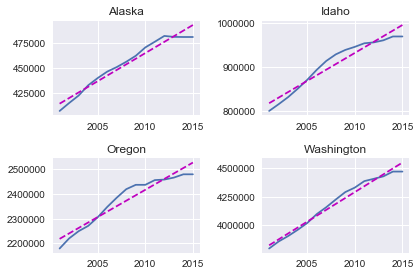

In [354]:
#SEA plots

print('SEA Region')

plt.plot(AK[xcolumn], AK[ycolumn])
plt.plot(ID[xcolumn], ID[ycolumn])
plt.plot(OR[xcolumn], OR[ycolumn])
plt.plot(WA[xcolumn], WA[ycolumn])
plt.title('SEA by State')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.legend(['AK','ID','OR','WA'])
plt.show()

plt.subplot(2,2,1)
line_regress_plot(AK[xcolumn], AK[ycolumn], 'Alaska')
plt.subplot(2,2,2)
line_regress_plot(ID[xcolumn], ID[ycolumn], 'Idaho')
plt.subplot(2,2,3)
line_regress_plot(OR[xcolumn], OR[ycolumn], 'Oregon')  
plt.subplot(2,2,4)
line_regress_plot(WA[xcolumn], WA[ycolumn], 'Washington')

plt.tight_layout()
plt.show()


SFO Region


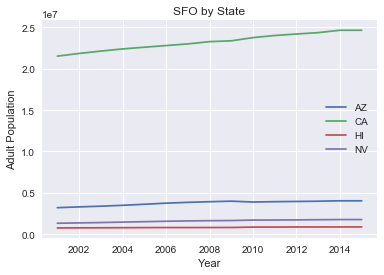

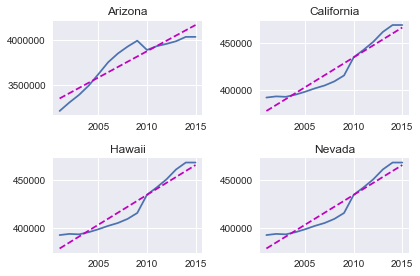

In [355]:
#SFO plots

print('SFO Region')

plt.plot(AZ[xcolumn], AZ[ycolumn])
plt.plot(CA[xcolumn], CA[ycolumn])
plt.plot(HI[xcolumn], HI[ycolumn])
plt.plot(NV[xcolumn], NV[ycolumn])
plt.title('SFO by State')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.legend(['AZ','CA','HI','NV'])
plt.show()

plt.subplot(2,2,1)
line_regress_plot(AZ[xcolumn], AZ[ycolumn], 'Arizona')
plt.subplot(2,2,2)
line_regress_plot(DC[xcolumn], DC[ycolumn], 'California')
plt.subplot(2,2,3)
line_regress_plot(DC[xcolumn], DC[ycolumn], 'Hawaii')   
plt.subplot(2,2,4)
line_regress_plot(DC[xcolumn], DC[ycolumn], 'Nevada')

plt.tight_layout()
plt.show()


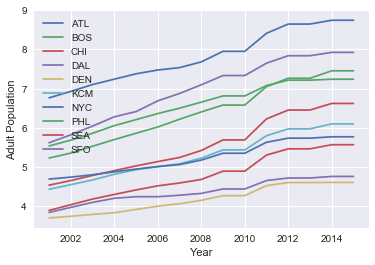

In [356]:
#groupby to plot population trends by region
SSA_agg = SSA_data.groupby(['Region Code','Date_numeric'])['Percent of Adult Population Receiving SSA Adult Disability Benefits'].mean()
SSA_agg_df=pd.DataFrame(SSA_agg).reset_index()
SSA_agg_df['Percent of Adult Population Receiving SSA Adult Disability Benefits']=SSA_agg_df['Percent of Adult Population Receiving SSA Adult Disability Benefits'].apply(np.float64)

#separate regions
r1=SSA_agg_df[SSA_agg_df['Region Code'] == 'ATL'][['Date_numeric','Percent of Adult Population Receiving SSA Adult Disability Benefits']]
r2=SSA_agg_df[SSA_agg_df['Region Code'] == 'BOS'][['Date_numeric','Percent of Adult Population Receiving SSA Adult Disability Benefits']]
r3=SSA_agg_df[SSA_agg_df['Region Code'] == 'CHI'][['Date_numeric','Percent of Adult Population Receiving SSA Adult Disability Benefits']]
r4=SSA_agg_df[SSA_agg_df['Region Code'] == 'DAL'][['Date_numeric','Percent of Adult Population Receiving SSA Adult Disability Benefits']]
r5=SSA_agg_df[SSA_agg_df['Region Code'] == 'DEN'][['Date_numeric','Percent of Adult Population Receiving SSA Adult Disability Benefits']]
r6=SSA_agg_df[SSA_agg_df['Region Code'] == 'KCM'][['Date_numeric','Percent of Adult Population Receiving SSA Adult Disability Benefits']]
r7=SSA_agg_df[SSA_agg_df['Region Code'] == 'NYC'][['Date_numeric','Percent of Adult Population Receiving SSA Adult Disability Benefits']]
r8=SSA_agg_df[SSA_agg_df['Region Code'] == 'PHL'][['Date_numeric','Percent of Adult Population Receiving SSA Adult Disability Benefits']]
r9=SSA_agg_df[SSA_agg_df['Region Code'] == 'SEA'][['Date_numeric','Percent of Adult Population Receiving SSA Adult Disability Benefits']]
r10=SSA_agg_df[SSA_agg_df['Region Code'] == 'SFO'][['Date_numeric','Percent of Adult Population Receiving SSA Adult Disability Benefits']]

#reset indexes
r_list=[r1,r2,r3,r4,r5,r6,r7,r7,r8,r9,r10]
for data in r_list:
    data.reset_index(inplace=True)

#plot d1 through d10 in one chart to compare growth
_=plt.plot(r1['Date_numeric'], r1['Percent of Adult Population Receiving SSA Adult Disability Benefits'])
_=plt.plot(r2['Date_numeric'], r2['Percent of Adult Population Receiving SSA Adult Disability Benefits'])
_=plt.plot(r3['Date_numeric'], r3['Percent of Adult Population Receiving SSA Adult Disability Benefits'])
_=plt.plot(r4['Date_numeric'], r4['Percent of Adult Population Receiving SSA Adult Disability Benefits'])
_=plt.plot(r5['Date_numeric'], r5['Percent of Adult Population Receiving SSA Adult Disability Benefits'])
_=plt.plot(r6['Date_numeric'], r6['Percent of Adult Population Receiving SSA Adult Disability Benefits'])
_=plt.plot(r7['Date_numeric'], r7['Percent of Adult Population Receiving SSA Adult Disability Benefits'])
_=plt.plot(r8['Date_numeric'], r8['Percent of Adult Population Receiving SSA Adult Disability Benefits'])
_=plt.plot(r9['Date_numeric'], r9['Percent of Adult Population Receiving SSA Adult Disability Benefits'])
_=plt.plot(r10['Date_numeric'], r10['Percent of Adult Population Receiving SSA Adult Disability Benefits'])

_=plt.xlabel('Year')
_=plt.ylabel(y_label)
_=plt.legend(['ATL', 'BOS', 'CHI', 'DAL', 'DEN', 'KCM', 'NYC', 'PHL', 'SEA', 'SFO'])
plt.show()

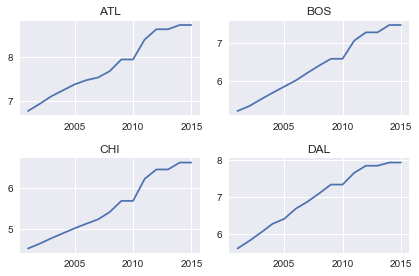

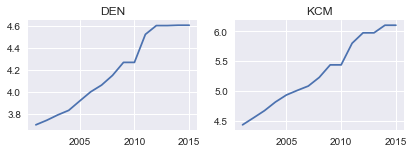

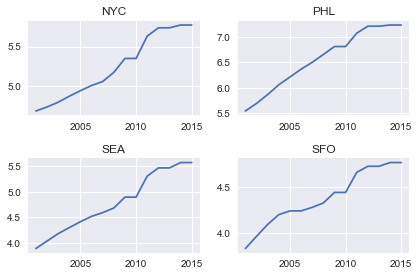

In [357]:
plt.subplot(2,2,1)
_=plt.plot(r1['Date_numeric'], r1['Percent of Adult Population Receiving SSA Adult Disability Benefits'])
_=plt.title('ATL')
plt.subplot(2,2,2)
_=plt.plot(r2['Date_numeric'], r2['Percent of Adult Population Receiving SSA Adult Disability Benefits'])
_=plt.title('BOS')
plt.subplot(2,2,3)
_=plt.plot(r3['Date_numeric'], r3['Percent of Adult Population Receiving SSA Adult Disability Benefits'])
_=plt.title('CHI')
plt.subplot(2,2,4)
_=plt.plot(r4['Date_numeric'], r4['Percent of Adult Population Receiving SSA Adult Disability Benefits'])
_=plt.title('DAL')

plt.tight_layout()
plt.show()

plt.subplot(2,2,1)
_=plt.plot(r5['Date_numeric'], r5['Percent of Adult Population Receiving SSA Adult Disability Benefits'])
_=plt.title('DEN')
plt.subplot(2,2,2)
_=plt.plot(r6['Date_numeric'], r6['Percent of Adult Population Receiving SSA Adult Disability Benefits'])
_=plt.title('KCM')

plt.tight_layout()
plt.show()

plt.subplot(2,2,1)
_=plt.plot(r7['Date_numeric'], r7['Percent of Adult Population Receiving SSA Adult Disability Benefits'])
_=plt.title('NYC')
plt.subplot(2,2,2)
_=plt.plot(r8['Date_numeric'], r8['Percent of Adult Population Receiving SSA Adult Disability Benefits'])
_=plt.title('PHL')
plt.subplot(2,2,3)
_=plt.plot(r9['Date_numeric'], r9['Percent of Adult Population Receiving SSA Adult Disability Benefits'])
_=plt.title('SEA')
plt.subplot(2,2,4)
_=plt.plot(r10['Date_numeric'], r10['Percent of Adult Population Receiving SSA Adult Disability Benefits'])
_=plt.title('SFO')

plt.tight_layout()
plt.show()

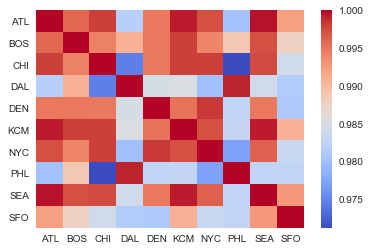

In [358]:
#plot correlations of regions

#create a dataframe with populations from all the regions
r_list_precent=[r1['Percent of Adult Population Receiving SSA Adult Disability Benefits'], r2['Percent of Adult Population Receiving SSA Adult Disability Benefits'], r3['Percent of Adult Population Receiving SSA Adult Disability Benefits'],r4['Percent of Adult Population Receiving SSA Adult Disability Benefits'],r5['Percent of Adult Population Receiving SSA Adult Disability Benefits'],r6['Percent of Adult Population Receiving SSA Adult Disability Benefits'],r7['Percent of Adult Population Receiving SSA Adult Disability Benefits'],r8['Percent of Adult Population Receiving SSA Adult Disability Benefits'],r9['Percent of Adult Population Receiving SSA Adult Disability Benefits'],r10['Percent of Adult Population Receiving SSA Adult Disability Benefits']]
corrs=pd.concat(r_list_precent, axis=1)
corrs.columns=['ATL', 'BOS', 'CHI', 'DAL', 'DEN', 'KCM', 'NYC', 'PHL', 'SEA', 'SFO']
corrs=corrs.corr()
#corrs.index=corrs.columns

sns.set()
sns.heatmap(corrs, cmap='coolwarm')

#shown by both the graphs above and the heatmap below, the NYC Region is a 
#clear outlier since it has had a shrinking number on dissability.

In [359]:
#Control Panel for changing the plots by state easier.

x_label='Year'
xcolumn='Date_numeric'


y_label='% of Adults on SSA Disability'
#ycolumn='Population age 18-64'
#ycolumn='Adult Favorable  Determination Rate'
ycolumn='Percent of Adult Population Receiving SSA Adult Disability Benefits'


ATL Region


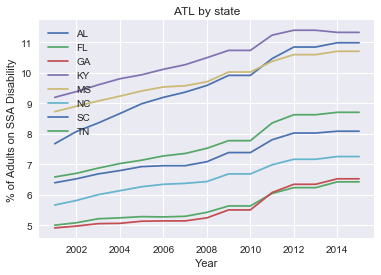

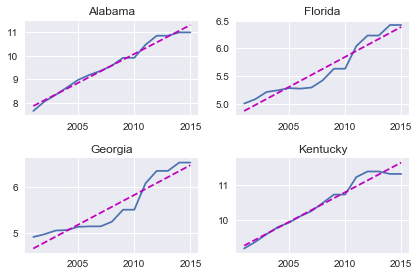

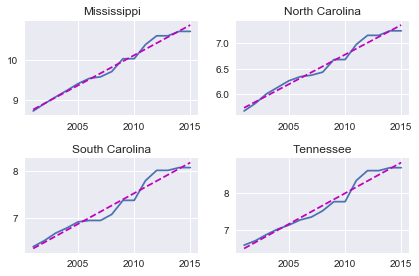

In [360]:
#ATL plots 

print('ATL Region')

plt.plot(AL[xcolumn], AL[ycolumn])
plt.plot(FL[xcolumn], FL[ycolumn])
plt.plot(GA[xcolumn], GA[ycolumn])
plt.plot(KY[xcolumn], KY[ycolumn])
plt.plot(MS[xcolumn], MS[ycolumn])
plt.plot(NC[xcolumn], NC[ycolumn])
plt.plot(SC[xcolumn], SC[ycolumn])
plt.plot(TN[xcolumn], TN[ycolumn])
plt.title('ATL by state')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.legend(['AL','FL','GA','KY','MS','NC','SC','TN'])
plt.show()


plt.subplot(2,2,1)
line_regress_plot(AL[xcolumn], AL[ycolumn], 'Alabama')
plt.subplot(2,2,2)
line_regress_plot(FL[xcolumn], FL[ycolumn], 'Florida')
plt.subplot(2,2,3)
line_regress_plot(GA[xcolumn], GA[ycolumn], 'Georgia')
plt.subplot(2,2,4)
line_regress_plot(KY[xcolumn], KY[ycolumn], 'Kentucky')

plt.tight_layout()
plt.show()

plt.subplot(2,2,1)
line_regress_plot(MS[xcolumn], MS[ycolumn], 'Mississippi')
plt.subplot(2,2,2)
line_regress_plot(NC[xcolumn], NC[ycolumn], 'North Carolina')
plt.subplot(2,2,3)
line_regress_plot(SC[xcolumn], SC[ycolumn], 'South Carolina') 
plt.subplot(2,2,4)
line_regress_plot(TN[xcolumn], TN[ycolumn], 'Tennessee')
    
plt.tight_layout()
plt.show()

BOS Region


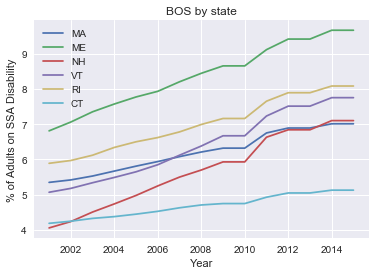

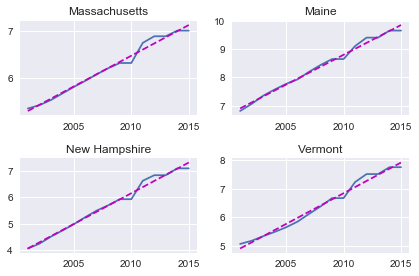

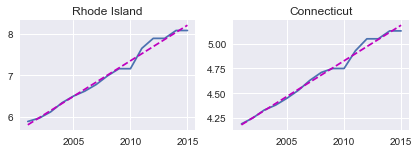

In [361]:
#BOS plots

print('BOS Region')

plt.plot(MA[xcolumn], MA[ycolumn])
plt.plot(ME[xcolumn], ME[ycolumn])
plt.plot(NH[xcolumn], NH[ycolumn])
plt.plot(VT[xcolumn], VT[ycolumn])
plt.plot(RI[xcolumn], RI[ycolumn])
plt.plot(CT[xcolumn], CT[ycolumn])
plt.title('BOS by state')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.legend(['MA','ME','NH','VT','RI','CT'])
plt.show()

plt.subplot(2,2,1)
line_regress_plot(MA[xcolumn], MA[ycolumn], 'Massachusetts')
plt.subplot(2,2,2)
line_regress_plot(ME[xcolumn], ME[ycolumn], 'Maine')
plt.subplot(2,2,3)
line_regress_plot(NH[xcolumn], NH[ycolumn], 'New Hampshire')
plt.subplot(2,2,4)
line_regress_plot(VT[xcolumn], VT[ycolumn], 'Vermont')
    
plt.tight_layout()
plt.show()


plt.subplot(2,2,1)
line_regress_plot(RI[xcolumn], RI[ycolumn], 'Rhode Island')
plt.subplot(2,2,2)
line_regress_plot(CT[xcolumn], CT[ycolumn], 'Connecticut')
    
plt.tight_layout()
plt.show()


CHI Region


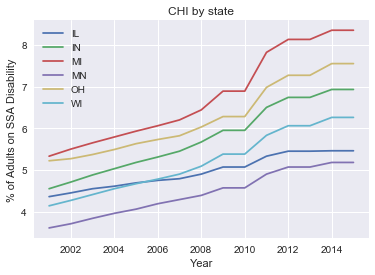

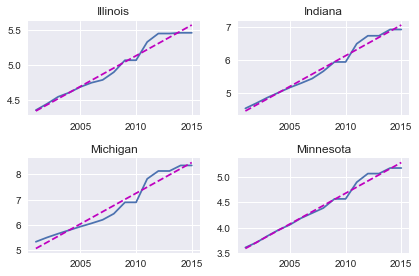

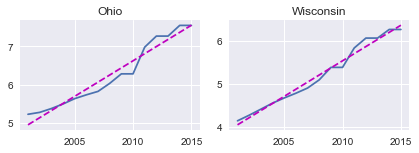

In [362]:
#CHI plots

print('CHI Region')

plt.plot(IL[xcolumn], IL[ycolumn])
plt.plot(IN[xcolumn], IN[ycolumn])
plt.plot(MI[xcolumn], MI[ycolumn])
plt.plot(MN[xcolumn], MN[ycolumn])
plt.plot(OH[xcolumn], OH[ycolumn])
plt.plot(WI[xcolumn], WI[ycolumn])
plt.title('CHI by state')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.legend(['IL','IN','MI','MN','OH','WI'])
plt.show()

plt.subplot(2,2,1)
line_regress_plot(IL[xcolumn], IL[ycolumn], 'Illinois')
plt.subplot(2,2,2)
line_regress_plot(IN[xcolumn], IN[ycolumn], 'Indiana')
plt.subplot(2,2,3)
line_regress_plot(MI[xcolumn], MI[ycolumn], 'Michigan')  
plt.subplot(2,2,4)
line_regress_plot(MN[xcolumn], MN[ycolumn], 'Minnesota') 

plt.tight_layout()
plt.show()

plt.subplot(2,2,1)
line_regress_plot(OH[xcolumn], OH[ycolumn], 'Ohio')
plt.subplot(2,2,2)
line_regress_plot(WI[xcolumn], WI[ycolumn], 'Wisconsin')
    
plt.tight_layout()
plt.show()

DAL Region


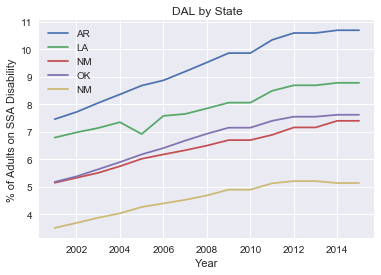

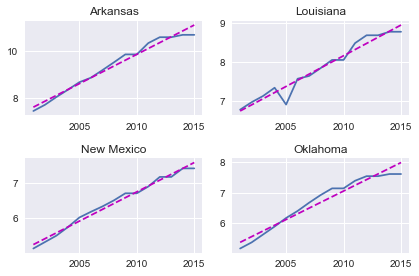

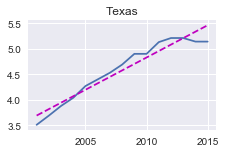

In [363]:
#DAL plots

print('DAL Region')

plt.plot(AR[xcolumn], AR[ycolumn])
plt.plot(LA[xcolumn], LA[ycolumn])
plt.plot(NM[xcolumn], NM[ycolumn])
plt.plot(OK[xcolumn], OK[ycolumn])
plt.plot(TX[xcolumn], TX[ycolumn])
plt.title('DAL by State')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.legend(['AR','LA','NM','OK','NM'])
plt.show()


plt.subplot(2,2,1)
line_regress_plot(AR[xcolumn], AR[ycolumn], 'Arkansas')
plt.subplot(2,2,2)
line_regress_plot(LA[xcolumn], LA[ycolumn], 'Louisiana')
plt.subplot(2,2,3)
line_regress_plot(NM[xcolumn], NM[ycolumn], 'New Mexico')
plt.subplot(2,2,4)
line_regress_plot(OK[xcolumn], OK[ycolumn], 'Oklahoma')
    
plt.tight_layout()
plt.show()

plt.subplot(2,2,1)
line_regress_plot(TX[xcolumn], TX[ycolumn], 'Texas')
    
plt.tight_layout()
plt.show()

DEN Region


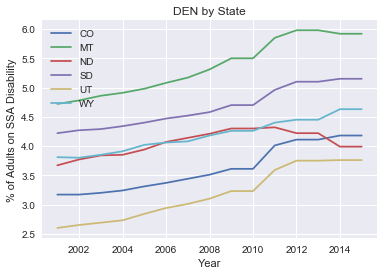

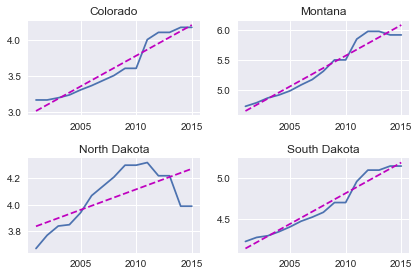

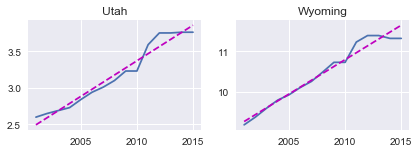

In [364]:
#DEN plots

print('DEN Region')

plt.plot(CO[xcolumn], CO[ycolumn])
plt.plot(MT[xcolumn], MT[ycolumn])
plt.plot(ND[xcolumn], ND[ycolumn])
plt.plot(SD[xcolumn], SD[ycolumn])
plt.plot(UT[xcolumn], UT[ycolumn])
plt.plot(WY[xcolumn], WY[ycolumn])
plt.title('DEN by State')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.legend(['CO','MT','ND','SD','UT','WY'])
plt.show()

plt.subplot(2,2,1)
line_regress_plot(CO[xcolumn], CO[ycolumn], 'Colorado')
plt.subplot(2,2,2)
line_regress_plot(MT[xcolumn], MT[ycolumn], 'Montana')
plt.subplot(2,2,3)
line_regress_plot(ND[xcolumn], ND[ycolumn], 'North Dakota')   
plt.subplot(2,2,4)
line_regress_plot(SD[xcolumn], SD[ycolumn], 'South Dakota')

plt.tight_layout()
plt.show()

plt.subplot(2,2,1)
line_regress_plot(UT[xcolumn], UT[ycolumn], 'Utah')
plt.subplot(2,2,2)
line_regress_plot(KY[xcolumn], KY[ycolumn], 'Wyoming')
    
plt.tight_layout()
plt.show()

KCM Region


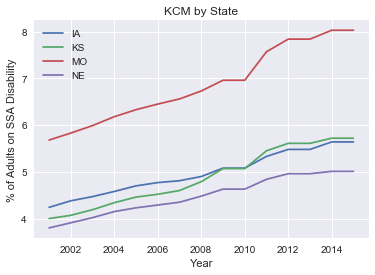

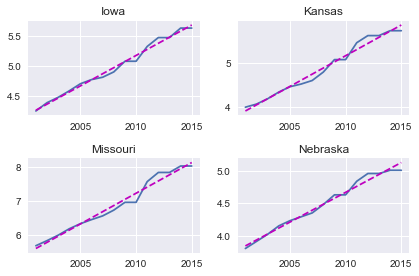

In [365]:
#KCM plots

print('KCM Region')

plt.plot(IA[xcolumn], IA[ycolumn])
plt.plot(KS[xcolumn], KS[ycolumn])
plt.plot(MO[xcolumn], MO[ycolumn])
plt.plot(NE[xcolumn], NE[ycolumn])
plt.title('KCM by State')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.legend(['IA','KS','MO','NE'])
plt.show()

plt.subplot(2,2,1)
line_regress_plot(IA[xcolumn], IA[ycolumn], 'Iowa')

plt.subplot(2,2,2)
line_regress_plot(KS[xcolumn], KS[ycolumn], 'Kansas')

plt.subplot(2,2,3)
line_regress_plot(MO[xcolumn], MO[ycolumn], 'Missouri')

plt.subplot(2,2,4)
line_regress_plot(NE[xcolumn], NE[ycolumn], 'Nebraska')
    
plt.tight_layout()
plt.show()

NYC Region


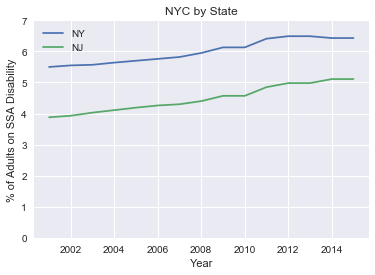

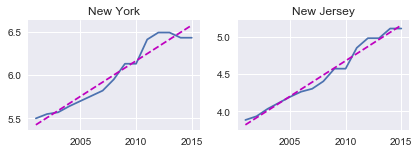

In [366]:
#NYC plots

print('NYC Region')

plt.plot(NY[xcolumn], NY[ycolumn])
plt.plot(NJ[xcolumn], NJ[ycolumn])
plt.title('NYC by State')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.legend(['NY','NJ'])
plt.ylim([0,7])
plt.show()

plt.subplot(2,2,1)
line_regress_plot(NY[xcolumn], NY[ycolumn], 'New York')
plt.subplot(2,2,2)
line_regress_plot(NJ[xcolumn], NJ[ycolumn], 'New Jersey')
    
plt.tight_layout()
plt.show()

PHL Region


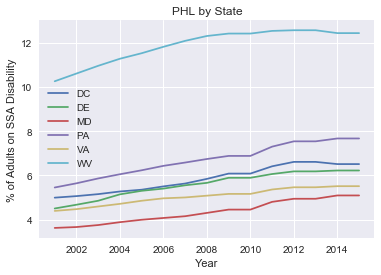

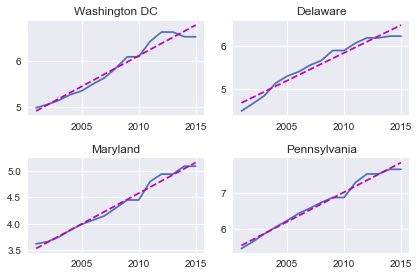

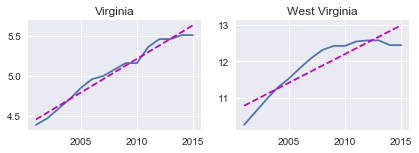

In [367]:
#PHL plots

print('PHL Region')

plt.plot(DC[xcolumn], DC[ycolumn])
plt.plot(DE[xcolumn], DE[ycolumn])
plt.plot(MD[xcolumn], MD[ycolumn])
plt.plot(PA[xcolumn], PA[ycolumn])
plt.plot(VA[xcolumn], VA[ycolumn])
plt.plot(WV[xcolumn], WV[ycolumn])
plt.title('PHL by State')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.legend(['DC','DE','MD','PA','VA','WV'])
plt.show()

plt.subplot(2,2,1)
line_regress_plot(DC[xcolumn], DC[ycolumn], 'Washington DC')
plt.subplot(2,2,2)
line_regress_plot(DE[xcolumn], DE[ycolumn], 'Delaware')
plt.subplot(2,2,3)
line_regress_plot(MD[xcolumn], MD[ycolumn], 'Maryland')  
plt.subplot(2,2,4)
line_regress_plot(PA[xcolumn], PA[ycolumn], 'Pennsylvania')

plt.tight_layout()
plt.show()

plt.subplot(2,2,1)
line_regress_plot(VA[xcolumn], VA[ycolumn], 'Virginia')
plt.subplot(2,2,2)
line_regress_plot(WV[xcolumn], WV[ycolumn], 'West Virginia')

plt.tight_layout()
plt.show()

SEA Region


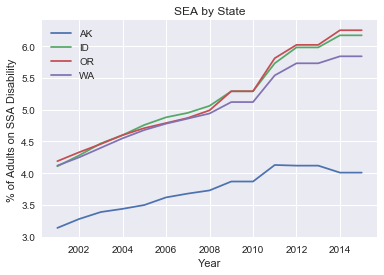

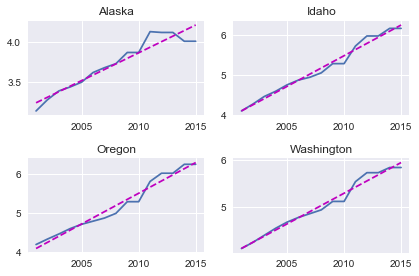

In [368]:
#SEA plots

print('SEA Region')

plt.plot(AK[xcolumn], AK[ycolumn])
plt.plot(ID[xcolumn], ID[ycolumn])
plt.plot(OR[xcolumn], OR[ycolumn])
plt.plot(WA[xcolumn], WA[ycolumn])
plt.title('SEA by State')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.legend(['AK','ID','OR','WA'])
plt.show()

plt.subplot(2,2,1)
line_regress_plot(AK[xcolumn], AK[ycolumn], 'Alaska')
plt.subplot(2,2,2)
line_regress_plot(ID[xcolumn], ID[ycolumn], 'Idaho')
plt.subplot(2,2,3)
line_regress_plot(OR[xcolumn], OR[ycolumn], 'Oregon')  
plt.subplot(2,2,4)
line_regress_plot(WA[xcolumn], WA[ycolumn], 'Washington')

plt.tight_layout()
plt.show()


SFO Region


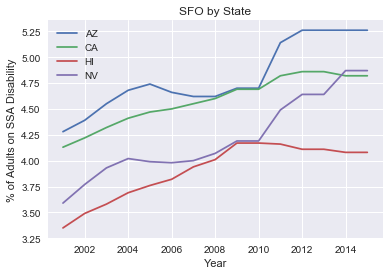

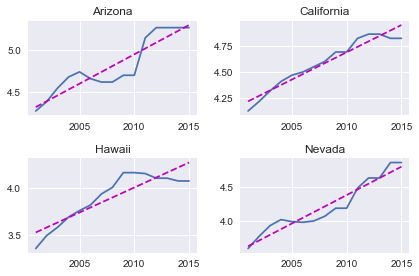

In [369]:
#SFO plots

print('SFO Region')

plt.plot(AZ[xcolumn], AZ[ycolumn])
plt.plot(CA[xcolumn], CA[ycolumn])
plt.plot(HI[xcolumn], HI[ycolumn])
plt.plot(NV[xcolumn], NV[ycolumn])
plt.title('SFO by State')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.legend(['AZ','CA','HI','NV'])
plt.show()

plt.subplot(2,2,1)
line_regress_plot(AZ[xcolumn], AZ[ycolumn], 'Arizona')
plt.subplot(2,2,2)
line_regress_plot(CA[xcolumn], CA[ycolumn], 'California')
plt.subplot(2,2,3)
line_regress_plot(HI[xcolumn], HI[ycolumn], 'Hawaii')   
plt.subplot(2,2,4)
line_regress_plot(NV[xcolumn], NV[ycolumn], 'Nevada')

plt.tight_layout()
plt.show()

Many of these charts seem to have a peculiar corelation between the adult populations and the rate of adults on disability benefits.  Below we explore to see if this claim is accurate and if it is statistically significant.

In [370]:
#corelation function
def corr_this(df,area):
    area_corr, p_corr=scipy.stats.pearsonr(df['Population age 18-64'],df['Percent of Adult Population Receiving SSA Adult Disability Benefits'])
    print(area)
    print('correlation: {}'.format(area_corr))
    print('p-value of the correlation: {}'.format(p_corr))
    print('')


In [371]:
print('Overall Correlations')
print('')
corr_this(SSA_data,'Overall')
corr_this(atl,'ATL')
corr_this(bos,'BOS')
corr_this(chi,'CHI')
corr_this(dal,'DAL')
corr_this(den,'DEN')
corr_this(kcm,'KCM')
corr_this(nyc,'NYC')
corr_this(phl,'PHL')
corr_this(sea,'SEA')
corr_this(sfo,'SFO')

Overall Correlations

Overall
correlation: -0.09254892358642502
p-value of the correlation: 0.010434448712336081

ATL
correlation: -0.6946084488451855
p-value of the correlation: 1.384188710307613e-18

BOS
correlation: -0.2718337718325935
p-value of the correlation: 0.009547708692030645

CHI
correlation: 0.29317763214232245
p-value of the correlation: 0.005041785166990123

DAL
correlation: -0.6413181530626314
p-value of the correlation: 5.691297670372512e-10

DEN
correlation: -0.48135387780782585
p-value of the correlation: 1.565133862862668e-06

KCM
correlation: 0.8706914333174277
p-value of the correlation: 1.5902425291361838e-19

NYC
correlation: 0.905963057081129
p-value of the correlation: 5.781571132359371e-12

PHL
correlation: -0.2207769392268611
p-value of the correlation: 0.03652146412963964

SEA
correlation: 0.43047212752656916
p-value of the correlation: 0.0005966445385695881

SFO
correlation: 0.35834949758623275
p-value of the correlation: 0.004932691488694113



In [372]:
print('ATL Correlations')
print('')
corr_this(AL,'Alabama')
corr_this(FL,'Florida')
corr_this(GA,'Georgia')
corr_this(KY,'Kentucky')
corr_this(MS,'Mississippi')
corr_this(NC,'North Carolina')
corr_this(SC,'South Carolina')
corr_this(TN,'Tennessee')

ATL Correlations

Alabama
correlation: 0.9684252307343922
p-value of the correlation: 3.2073178708822418e-09

Florida
correlation: 0.92254265540129
p-value of the correlation: 9.79027220677552e-07

Georgia
correlation: 0.822304881344573
p-value of the correlation: 0.00016807578727641968

Kentucky
correlation: 0.9743312688434367
p-value of the correlation: 8.467260073650935e-10

Mississippi
correlation: 0.9674250779033698
p-value of the correlation: 3.918539369101315e-09

North Carolina
correlation: 0.9745541293986858
p-value of the correlation: 8.004973104312492e-10

South Carolina
correlation: 0.9633815065114025
p-value of the correlation: 8.30216918143259e-09

Tennessee
correlation: 0.9613613336638263
p-value of the correlation: 1.1712769278098631e-08



Despite the region having a negitive correlation, all the states have high correlations.

In [373]:
print('BOS Correlations')
print('')
corr_this(MA,'Massachusetts')
corr_this(ME, 'Maine')
corr_this(NH, 'New Hampshire')
corr_this(VT, 'Vermont')
corr_this(RI, 'Rhode Island')
corr_this(CT, 'Connecticut')

BOS Correlations

Massachusetts
correlation: 0.9824753038184668
p-value of the correlation: 7.225121771013854e-11

Maine
correlation: 0.5721856944873227
p-value of the correlation: 0.025821119510951125

New Hampshire
correlation: 0.8268407967771894
p-value of the correlation: 0.00014373223035467735

Vermont
correlation: 0.49619084588785317
p-value of the correlation: 0.05993904590975192

Rhode Island
correlation: 0.578047695155916
p-value of the correlation: 0.024004130039664062

Connecticut
correlation: 0.9726778397209385
p-value of the correlation: 1.2654132823467335e-09



In [374]:
print('CHI Correlations')
print('')
corr_this(IL,'Illinois')
corr_this(IN, 'Indiana')
corr_this(MI, 'Michigan')
corr_this(MN, 'Minnisota')
corr_this(OH, 'Ohio')
corr_this(WI, 'Wisconsin')

CHI Correlations

Illinois
correlation: 0.825692311048267
p-value of the correlation: 0.00014960267096533438

Indiana
correlation: 0.9671933427998751
p-value of the correlation: 4.101021659125878e-09

Michigan
correlation: -0.6728293921009005
p-value of the correlation: 0.005982787610776272

Minnisota
correlation: 0.9687763759276984
p-value of the correlation: 2.9849726800407203e-09

Ohio
correlation: 0.6120826444541521
p-value of the correlation: 0.015298618536779373

Wisconsin
correlation: 0.8683679363492327
p-value of the correlation: 2.6868450481502403e-05



Note that Michigan is the only state that has a negative correlation.

In [375]:
print('DAL Correlations')
print('')
corr_this(AR,'Arkansas')
corr_this(LA, 'Louisiana')
corr_this(NM, 'New Mexico')
corr_this(OK, 'Oklahoma')
corr_this(TX, 'Texas')

DAL Correlations

Arkansas
correlation: 0.9858549304682768
p-value of the correlation: 1.8095488639358608e-11

Louisiana
correlation: 0.7798355744798173
p-value of the correlation: 0.0006064295508698128

New Mexico
correlation: 0.961593386925576
p-value of the correlation: 1.1269346889820364e-08

Oklahoma
correlation: 0.9754456179453904
p-value of the correlation: 6.362355117662692e-10

Texas
correlation: 0.9738973512623643
p-value of the correlation: 9.432140279088445e-10



In [376]:
print('DEN Correlations')
print('')
corr_this(CO,'Colorado')
corr_this(MT, 'Montana')
corr_this(ND, 'North Dakota')
corr_this(SD, 'South Dakota')
corr_this(UT, 'Utah')
corr_this(WY, 'Wyoming')

DEN Correlations

Colorado
correlation: 0.9494973242823139
p-value of the correlation: 6.487210023107413e-08

Montana
correlation: 0.9483474768735306
p-value of the correlation: 7.488496824843983e-08

North Dakota
correlation: 0.4532818256865542
p-value of the correlation: 0.08971636235041817

South Dakota
correlation: 0.9617351535255083
p-value of the correlation: 1.1005468302032618e-08

Utah
correlation: 0.939578563366814
p-value of the correlation: 2.0312276307852382e-07

Wyoming
correlation: 0.9613683274070438
p-value of the correlation: 1.1699193822150151e-08



In [377]:
print('KCM Correlations')
print('')
corr_this(IA,'Iowa')
corr_this(KS, 'Kansas')
corr_this(MO, 'Missouri')
corr_this(NE, 'Nebraska')

KCM Correlations

Iowa
correlation: 0.9770414768045115
p-value of the correlation: 4.1265069926527676e-10

Kansas
correlation: 0.9564692729144959
p-value of the correlation: 2.5121272536891242e-08

Missouri
correlation: 0.9019443754486283
p-value of the correlation: 4.308942212152575e-06

Nebraska
correlation: 0.9929021511004227
p-value of the correlation: 2.0810687976486082e-13



In [378]:
print('NYC Correlations')
print('')
corr_this(NY,'New York')
corr_this(NJ, 'New Jersey')

NYC Correlations

New York
correlation: 0.923586914784196
p-value of the correlation: 8.986549884112773e-07

New Jersey
correlation: 0.9768285248374782
p-value of the correlation: 4.379488592630018e-10



In [379]:
print('PHL Correlations')
print('')
corr_this(DC,'Washington DC')
corr_this(DE, 'Delaware')
corr_this(MD, 'Maryland')
corr_this(PA, 'Pennsylvania')
corr_this(VA, 'Virginia')
corr_this(WV, 'West Virginia')

PHL Correlations

Washington DC
correlation: 0.9448306294658061
p-value of the correlation: 1.139246784990759e-07

Delaware
correlation: 0.991209902619092
p-value of the correlation: 8.320786506100105e-13

Maryland
correlation: 0.9837246200497458
p-value of the correlation: 4.480961357082907e-11

Pennsylvania
correlation: 0.9597066562855121
p-value of the correlation: 1.5321182455958928e-08

Virginia
correlation: 0.9901811633057165
p-value of the correlation: 1.7042248183438862e-12

West Virginia
correlation: 0.7446977939579219
p-value of the correlation: 0.001447665750495016



In [380]:
print('SEA Correlations')
print('')
corr_this(AK,'Alaska')
corr_this(ID, 'Idaho')
corr_this(OR, 'Oregon')
corr_this(WA, 'Washington')

SEA Correlations

Alaska
correlation: 0.9862536637460365
p-value of the correlation: 1.504068204813683e-11

Idaho
correlation: 0.9432964184637372
p-value of the correlation: 1.3565154783989987e-07

Oregon
correlation: 0.9155652398179878
p-value of the correlation: 1.6858335815785559e-06

Washington
correlation: 0.9770834028914042
p-value of the correlation: 4.078181563800318e-10



In [381]:
print('SFO Correlations')
print('')
corr_this(AZ,'Arizona')
corr_this(CA, 'California')
corr_this(HI, 'Hawaii')
corr_this(NV, 'Nevada')

SFO Correlations

Arizona
correlation: 0.7754282114804617
p-value of the correlation: 0.0006819214977733891

California
correlation: 0.9771884973511646
p-value of the correlation: 3.9591395067845235e-10

Hawaii
correlation: 0.8581007652806311
p-value of the correlation: 4.266070640943579e-05

Nevada
correlation: 0.8963136986584633
p-value of the correlation: 6.10826493591479e-06



Hypothesis that the adult population was correlated with the rate of adults on disability returned with mixed results.  Although most of the states came back with very high correlations, most of the regions came back with negative and weaker correlations.  This was surprising seen as the regions exibited high correlations when only considering population or rate of disability.  There is a chance that both of these variables happen to be correlated due to outside forces.  Evidence of this could be seen in Michigan since with high correlations elsewhere, we would expect the rate to go down if it were true.  As the sole state with a negative population growth, this may be a telling sign.